# Classification model using Random Forest

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

### 2. Upload RNA data

In [2]:
path ='../../../../Data_preprocessing/Prediction PFS/RNA+Clinic joined/Clinical_data_and_RNA_30_Features_PFS.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,RP11-96O20.4,RP5-827C21.1,RPS12P26,SDR42E1,SNORD113-5,TARBP2,TRAV41,TRIM43B,VN2R17P,XPC
0,0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,12.164384,1.374775,...,21.18753,27.40814,31.71139,30.26124,21.32743,29.60417,22.22154,21.9744,21.12857,32.24472
1,1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.490411,1.374775,...,21.18753,29.25015,29.15373,29.12730,21.32743,29.61188,22.22154,21.9744,21.12857,32.15619
2,2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,62.0,0.0,0.0,1.0,707.0,0.0,61.906849,1.374775,...,21.18753,23.03429,29.37858,27.22907,21.32743,31.90343,22.22154,21.9744,21.12857,31.86536
3,3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,62.0,0.0,0.0,3.0,707.0,0.0,1.249315,1.374775,...,21.18753,23.03429,30.19136,22.83731,21.32743,30.35424,22.22154,21.9744,21.12857,31.63561
4,4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.654795,1.374775,...,21.18753,23.03429,31.82172,22.83731,21.32743,31.60946,22.22154,21.9744,21.12857,33.12717


In [3]:
X = data[['AC005307.1', 'ATP5G2P1', 'DLGAP4', 'EIF4A1P9', 'FAM172BP', 'FAM224A', 'GJA9', 'GPR155', 'GYPE', 'IL25', 'KLHL5', 'LANCL1-AS1', 'LEMD1', 'PCMT1', 'RP11-120J4.1', 'RP11-20G6.3', 'RP11-349G13.2', 'RP11-374M1.2', 'RP11-536C10.21', 'RP11-95G17.2', 'RP11-96O20.4', 'RP5-827C21.1', 'RPS12P26', 'SDR42E1', 'SNORD113-5', 'TARBP2', 'TRAV41', 'TRIM43B', 'VN2R17P', 'XPC']] #Seleccionamos todas las columnas quitando la columna Unnamed (id de la fila ) y la columna Target.

Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    elif data.PFS[i]<6:
        Y.append(1)
    else:
        Y.append(2)# If PFS is over 3 months, I will consider it as Responder (R)


print(X)
print('Numero de pacientes: ',len(Y))

     AC005307.1   ATP5G2P1    DLGAP4  EIF4A1P9  FAM172BP   FAM224A      GJA9  \
0     21.055379  21.300337  34.54982  21.37925  21.62929  21.12373  29.68286   
1     21.055379  21.300337  34.06647  21.37925  21.62929  21.12373  26.80539   
2     21.055379  21.300337  34.42561  25.08766  29.29206  21.12373  30.09292   
3     21.055379  21.300337  34.41176  26.76156  21.62929  21.12373  29.29223   
4     21.055379  21.300337  34.29088  21.37925  21.62929  21.12373  32.00382   
..          ...        ...       ...       ...       ...       ...       ...   
176   20.944668  21.624881  34.55658  21.78113  21.49653  20.98542  28.18967   
177   20.944668  21.624881  33.15506  21.78113  21.49653  20.98542  28.18967   
178   20.944668  21.624881  34.68047  21.78113  25.64475  23.49110  28.18967   
179   20.944668  21.624881  35.60014  21.78113  21.49653  20.98542  33.92530   
180   20.944668  21.624881  35.23053  21.78113  21.49653  20.98542  28.18967   

       GPR155      GYPE      IL25  ... 

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125)

# Convert sets to arrays
XTrain = XTrain.values
XTest = XTest.values

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Select the parameters of the model and fit it

In [5]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5],
              'random_state':[125],
              'n_estimators': [10, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20], 'random_state': [125]})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       min_samples_split=3, n_estimators=20, random_state=125)

In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5830049261083744


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:1.0
Final accuracy on the testing dataset: 0.43243243243243246


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[65  0  0]
 [ 0 28  0]
 [ 0  0 51]]
Input data:  [0 2 1 1 1 1 0 2 0 1 2 2 1 0 2 0 2 0 0 0 2 1 0 0 2 2 0 1 0 0 1 1 0 2 1 0 1
 2 0 2 2 0 0 1 0 1 1 0 1 0 0 1 0 0 0 2 0 2 0 2 1 0 2 2 0 2 2 2 0 2 0 2 0 2
 2 0 0 2 0 0 1 2 1 0 0 0 0 2 1 2 2 0 0 2 2 2 2 0 0 0 2 0 2 0 0 0 0 1 0 2 0
 2 0 2 1 0 0 0 0 1 2 2 0 2 0 2 2 0 1 2 0 1 2 0 0 2 2 1 2 1 2 2 0 0]
Prediction:        [0 2 1 1 1 1 0 2 0 1 2 2 1 0 2 0 2 0 0 0 2 1 0 0 2 2 0 1 0 0 1 1 0 2 1 0 1
 2 0 2 2 0 0 1 0 1 1 0 1 0 0 1 0 0 0 2 0 2 0 2 1 0 2 2 0 2 2 2 0 2 0 2 0 2
 2 0 0 2 0 0 1 2 1 0 0 0 0 2 1 2 2 0 0 2 2 2 2 0 0 0 2 0 2 0 0 0 0 1 0 2 0
 2 0 2 1 0 0 0 0 1 2 2 0 2 0 2 2 0 1 2 0 1 2 0 0 2 2 1 2 1 2 2 0 0]


In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        51

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[11  4  5]
 [ 1  0  2]
 [ 7  2  5]]
Input data:  [1 0 0 2 2 1 0 2 2 2 0 0 0 0 0 0 2 0 1 0 0 0 0 2 0 0 2 2 2 0 0 2 0 0 2 2 2]
Prediction:        [0 2 0 0 1 2 0 2 2 0 2 1 0 0 1 2 2 0 2 0 0 0 2 0 1 2 0 1 0 0 0 2 1 0 2 0 0]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.58      0.55      0.56        20
           1       0.00      0.00      0.00         3
           2       0.42      0.36      0.38        14

    accuracy                           0.43        37
   macro avg       0.33      0.30      0.32        37
weighted avg       0.47      0.43      0.45        37



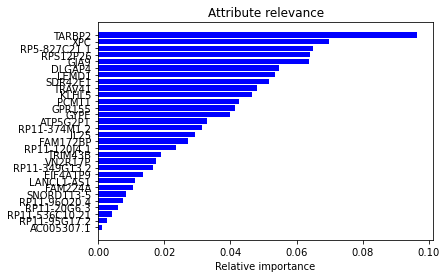

AC005307.1 = 0.0012912685903439319
ATP5G2P1 = 0.03304258959244426
DLGAP4 = 0.05477390323786609
EIF4A1P9 = 0.013458080673970621
FAM172BP = 0.02702761688918336
FAM224A = 0.01043027246673887
GJA9 = 0.06370739360723807
GPR155 = 0.041499515927154416
GYPE = 0.040007253703677075
IL25 = 0.02921210496815324
KLHL5 = 0.04638143494731549
LANCL1-AS1 = 0.01119249560781678
LEMD1 = 0.05345863734809644
PCMT1 = 0.042638253489071534
RP11-120J4.1 = 0.0235004202703429
RP11-20G6.3 = 0.006112650294419207
RP11-349G13.2 = 0.01651623123738916
RP11-374M1.2 = 0.03125352133158186
RP11-536C10.21 = 0.004173548943850492
RP11-95G17.2 = 0.002651702921031936
RP11-96O20.4 = 0.007572462098129446
RP5-827C21.1 = 0.06507775471059998
RPS12P26 = 0.06401182678507857
SDR42E1 = 0.05166864576595935
SNORD113-5 = 0.008383357586992837
TARBP2 = 0.09644564879329441
TRAV41 = 0.04811121121369955
TRIM43B = 0.019064468703324604
VN2R17P = 0.017401340238824566
XPC = 0.06993438805641092


In [15]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Attribute relevance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.